In [1]:
# importing the necessary libraries
#from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
diabetes_data = pd.read_csv("diabetes.csv")
diabetes_data.head()
#pd.set_option("display.max_row",None)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

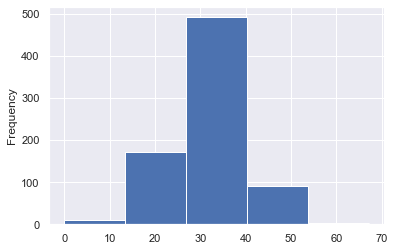

In [5]:
diabetes_data['BMI'].plot.hist(bins=5)

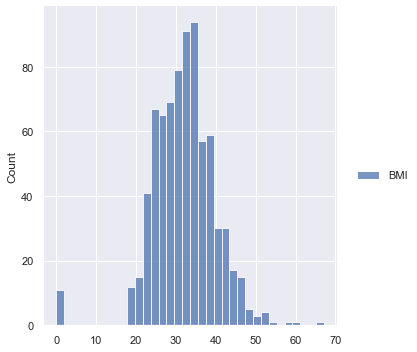

In [6]:
sns.displot(data=[diabetes_data['BMI']])

In [7]:
diabetes_data_copy = diabetes_data.copy(deep = True) # creating the copy of the dataset
# replacing the 0 values with Nan
diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN) 

In [17]:
diabetes_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

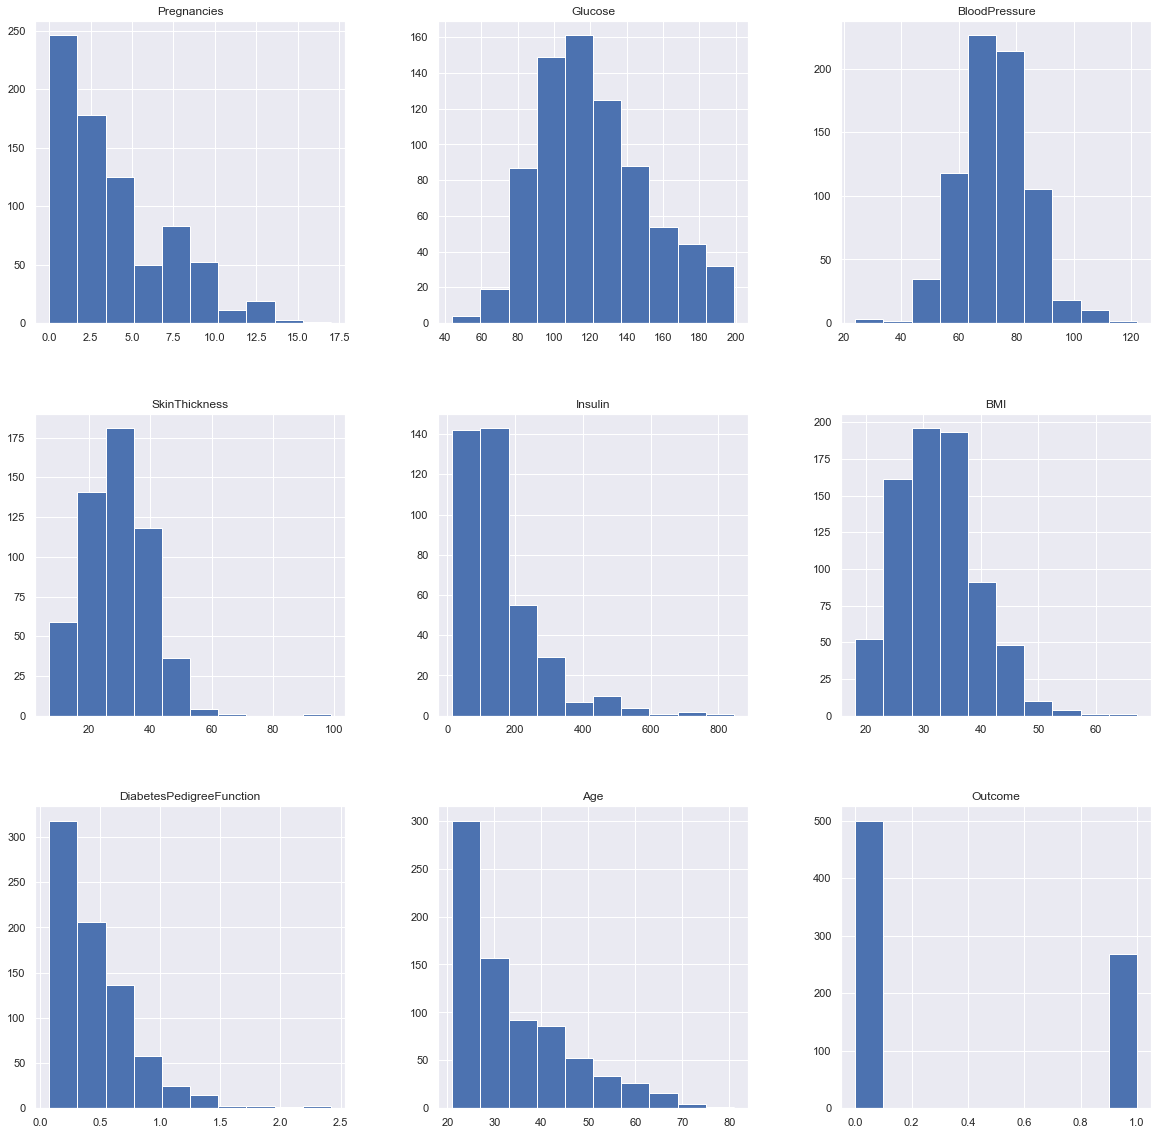

In [11]:
diabetes_data_copy.hist(figsize=(20,20))

<AxesSubplot:>

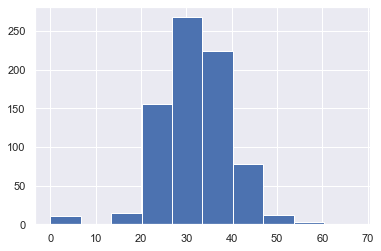

In [15]:
diabetes_data["BMI"].hist()

In [16]:
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].median(),inplace=True)

In [18]:
diabetes_data_copy['Glucose'].fillna(diabetes_data_copy['Glucose'].mean(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [19]:
diabetes_data_copy['BloodPressure'].fillna(diabetes_data_copy['BloodPressure'].mean(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
diabetes_data_copy['SkinThickness'].fillna(diabetes_data_copy['SkinThickness'].median(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [21]:
diabetes_data_copy['Insulin'].fillna(diabetes_data_copy['Insulin'].median(), inplace = True)
diabetes_data_copy.isna().sum()

Pregnancies                  0
Glucose                      0
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [22]:
diabetes_data_copy['BMI'].fillna(diabetes_data_copy['BMI'].median(),inplace=True)

In [23]:
import missingno as msno

<AxesSubplot:>

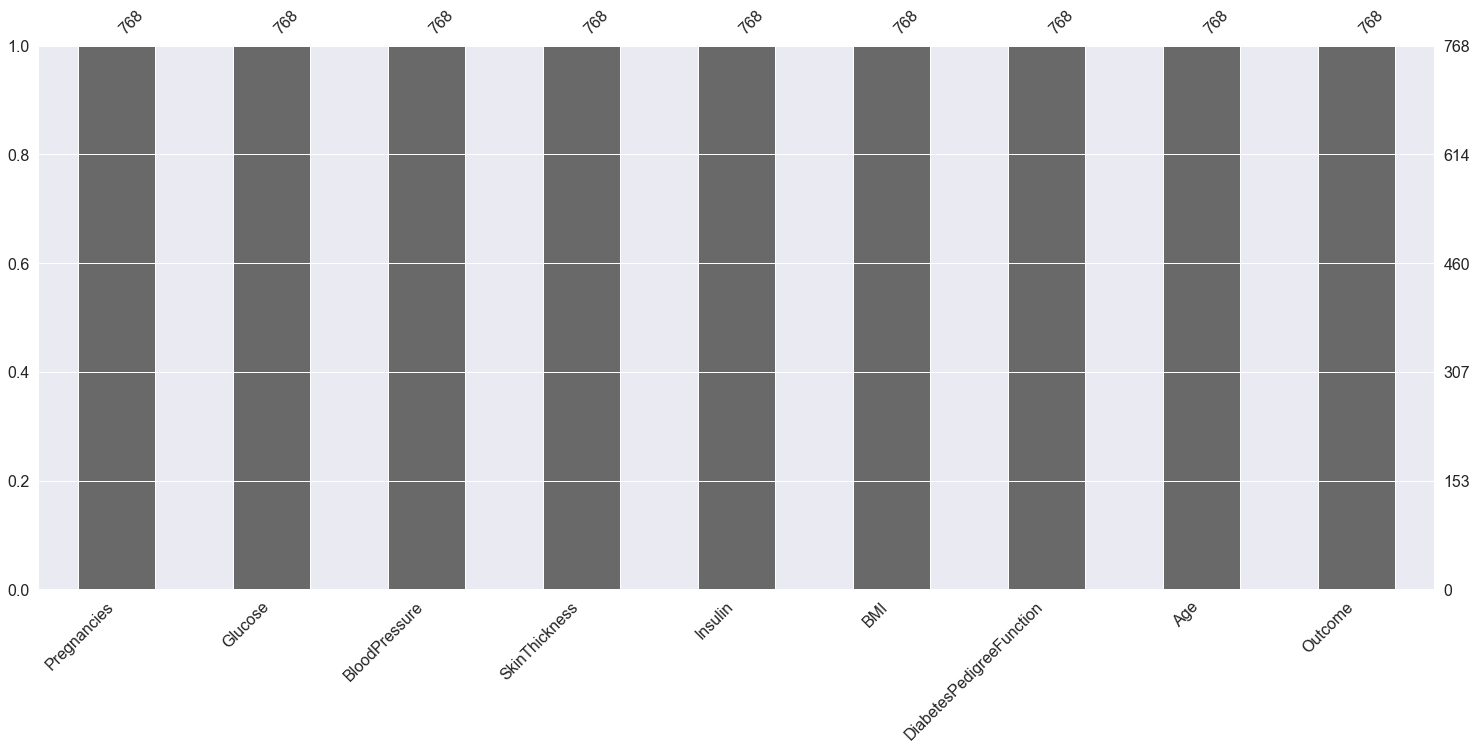

In [27]:
msno.bar(diabetes_data_copy)

0    500
1    268
Name: Outcome, dtype: int64

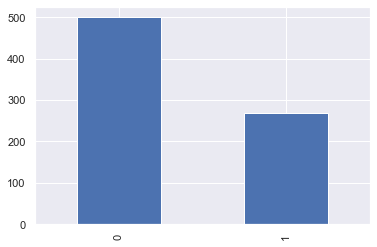

In [29]:
diabetes_data.Outcome.value_counts().plot(kind = 'bar')
diabetes_data.Outcome.value_counts()

In [30]:
from pandas.plotting import scatter_matrix

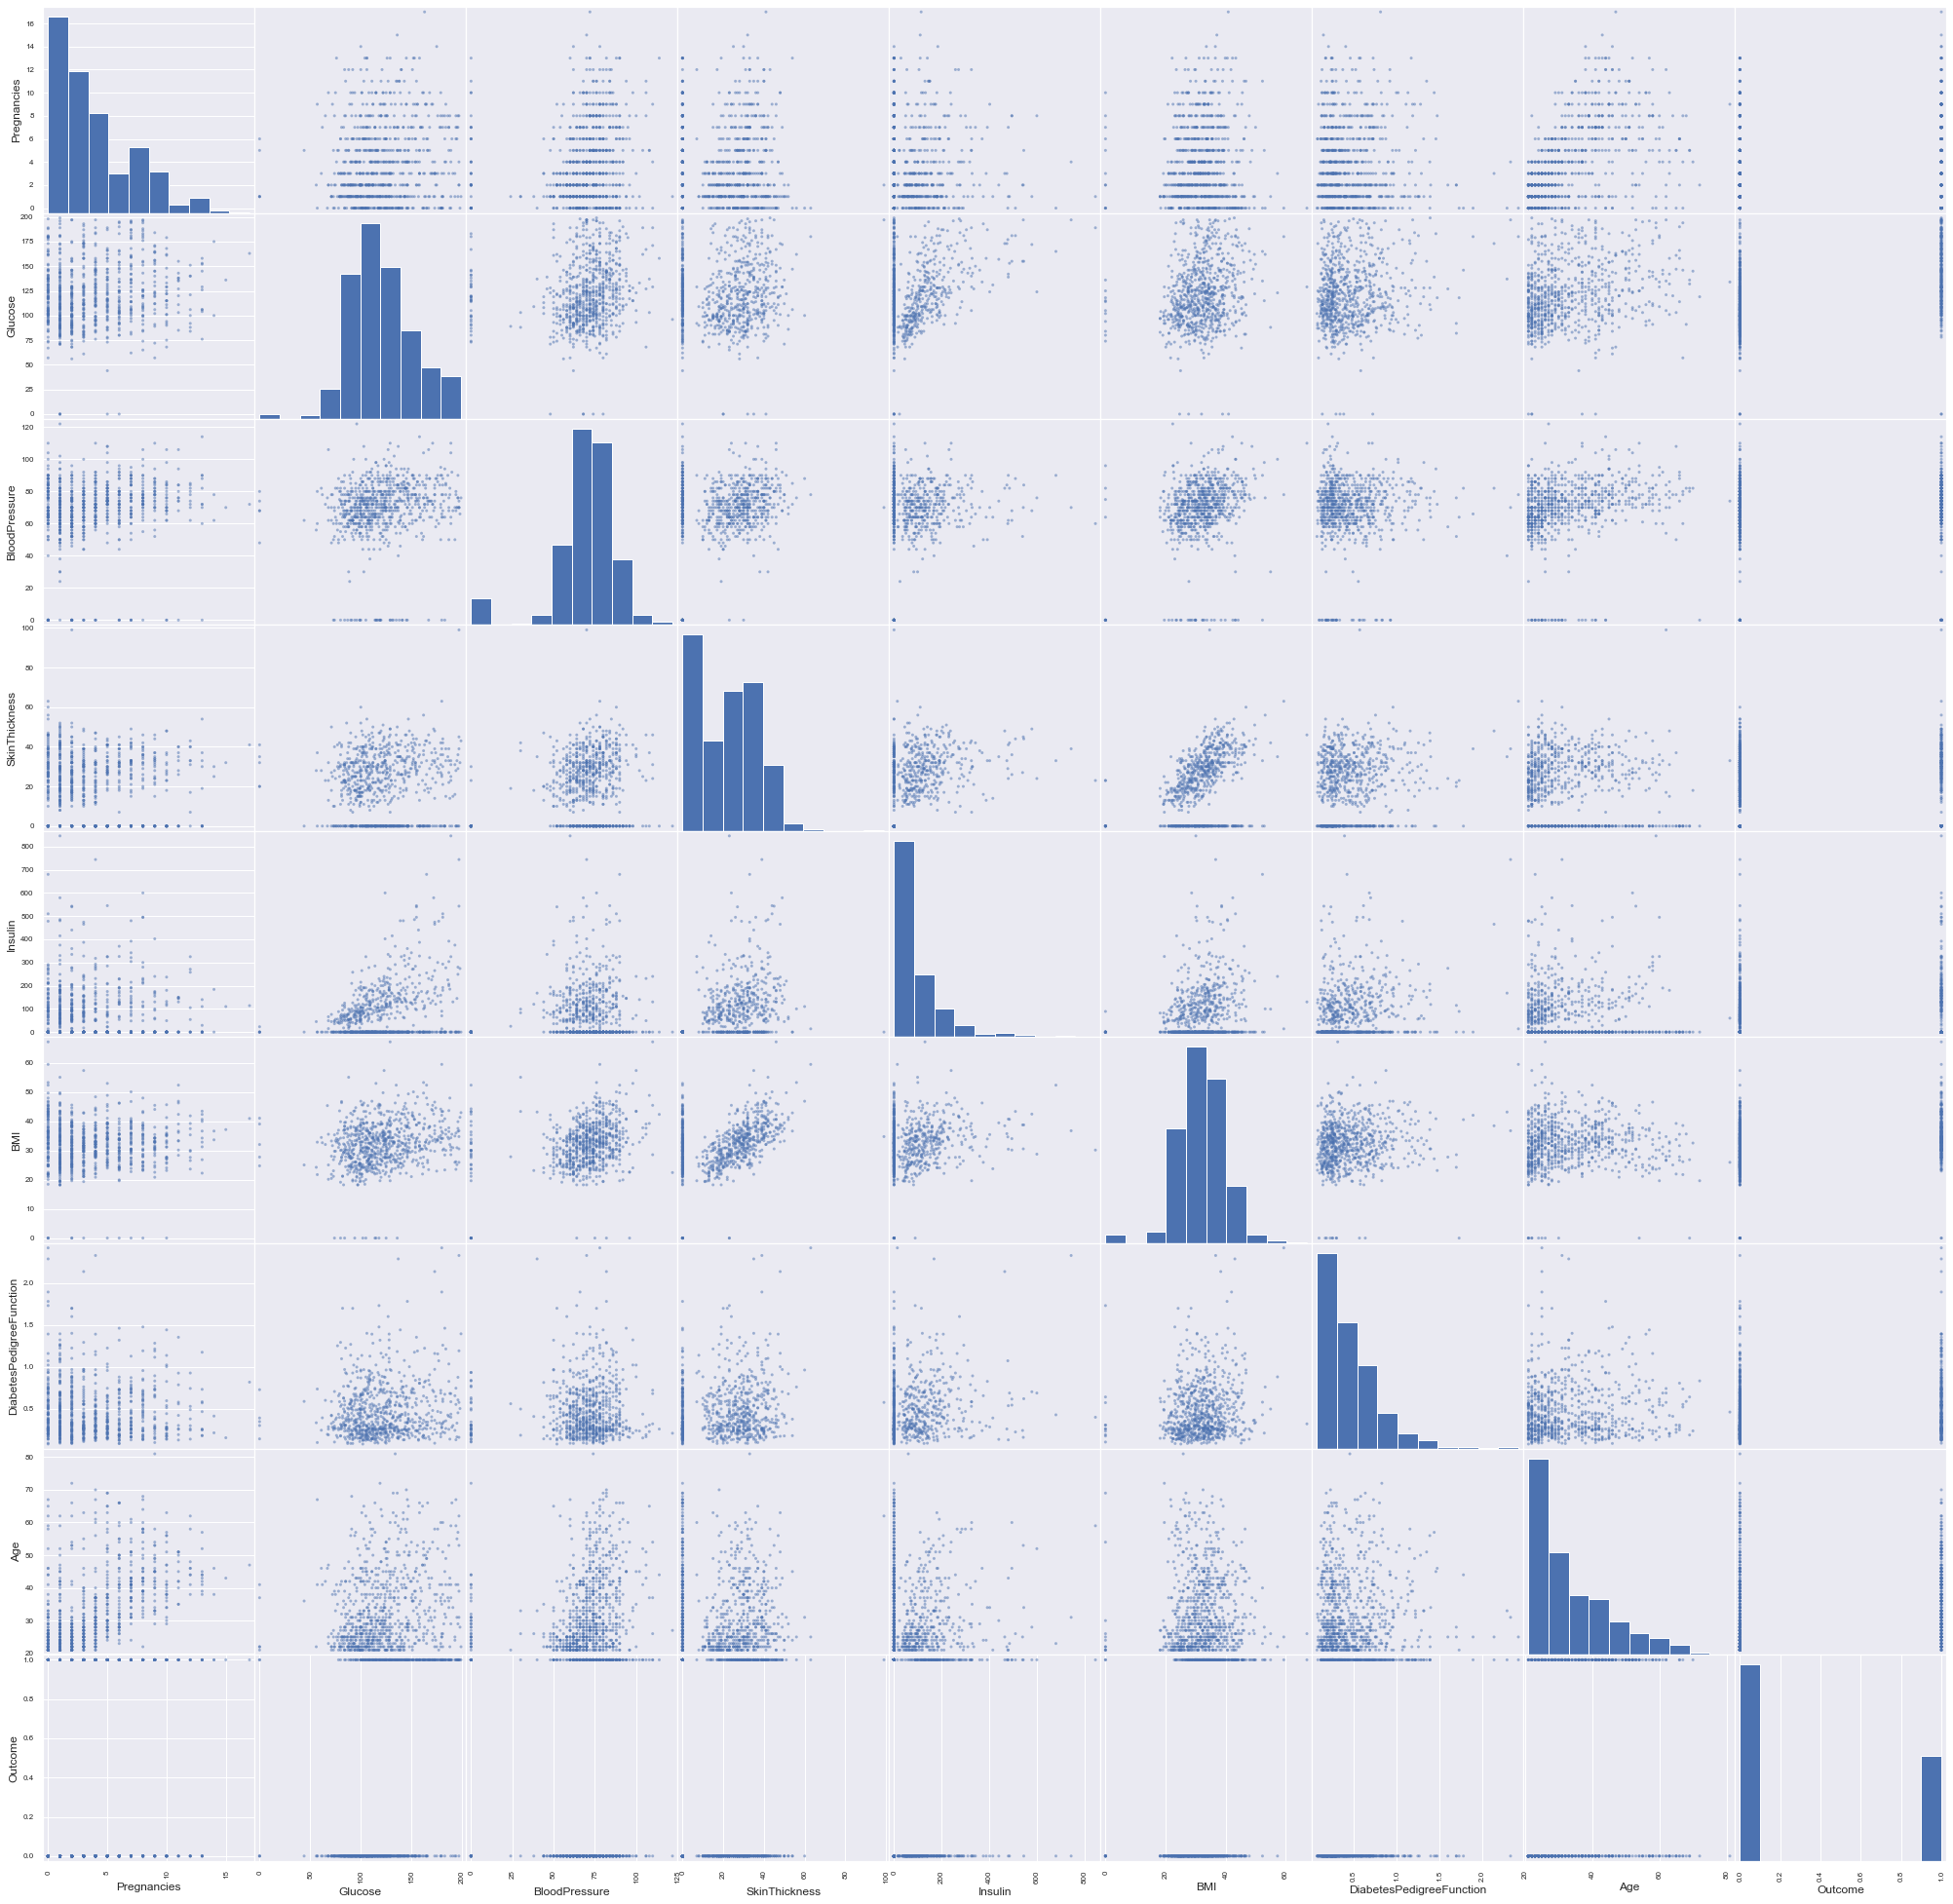

In [35]:
p = scatter_matrix(diabetes_data,figsize=(35,35))

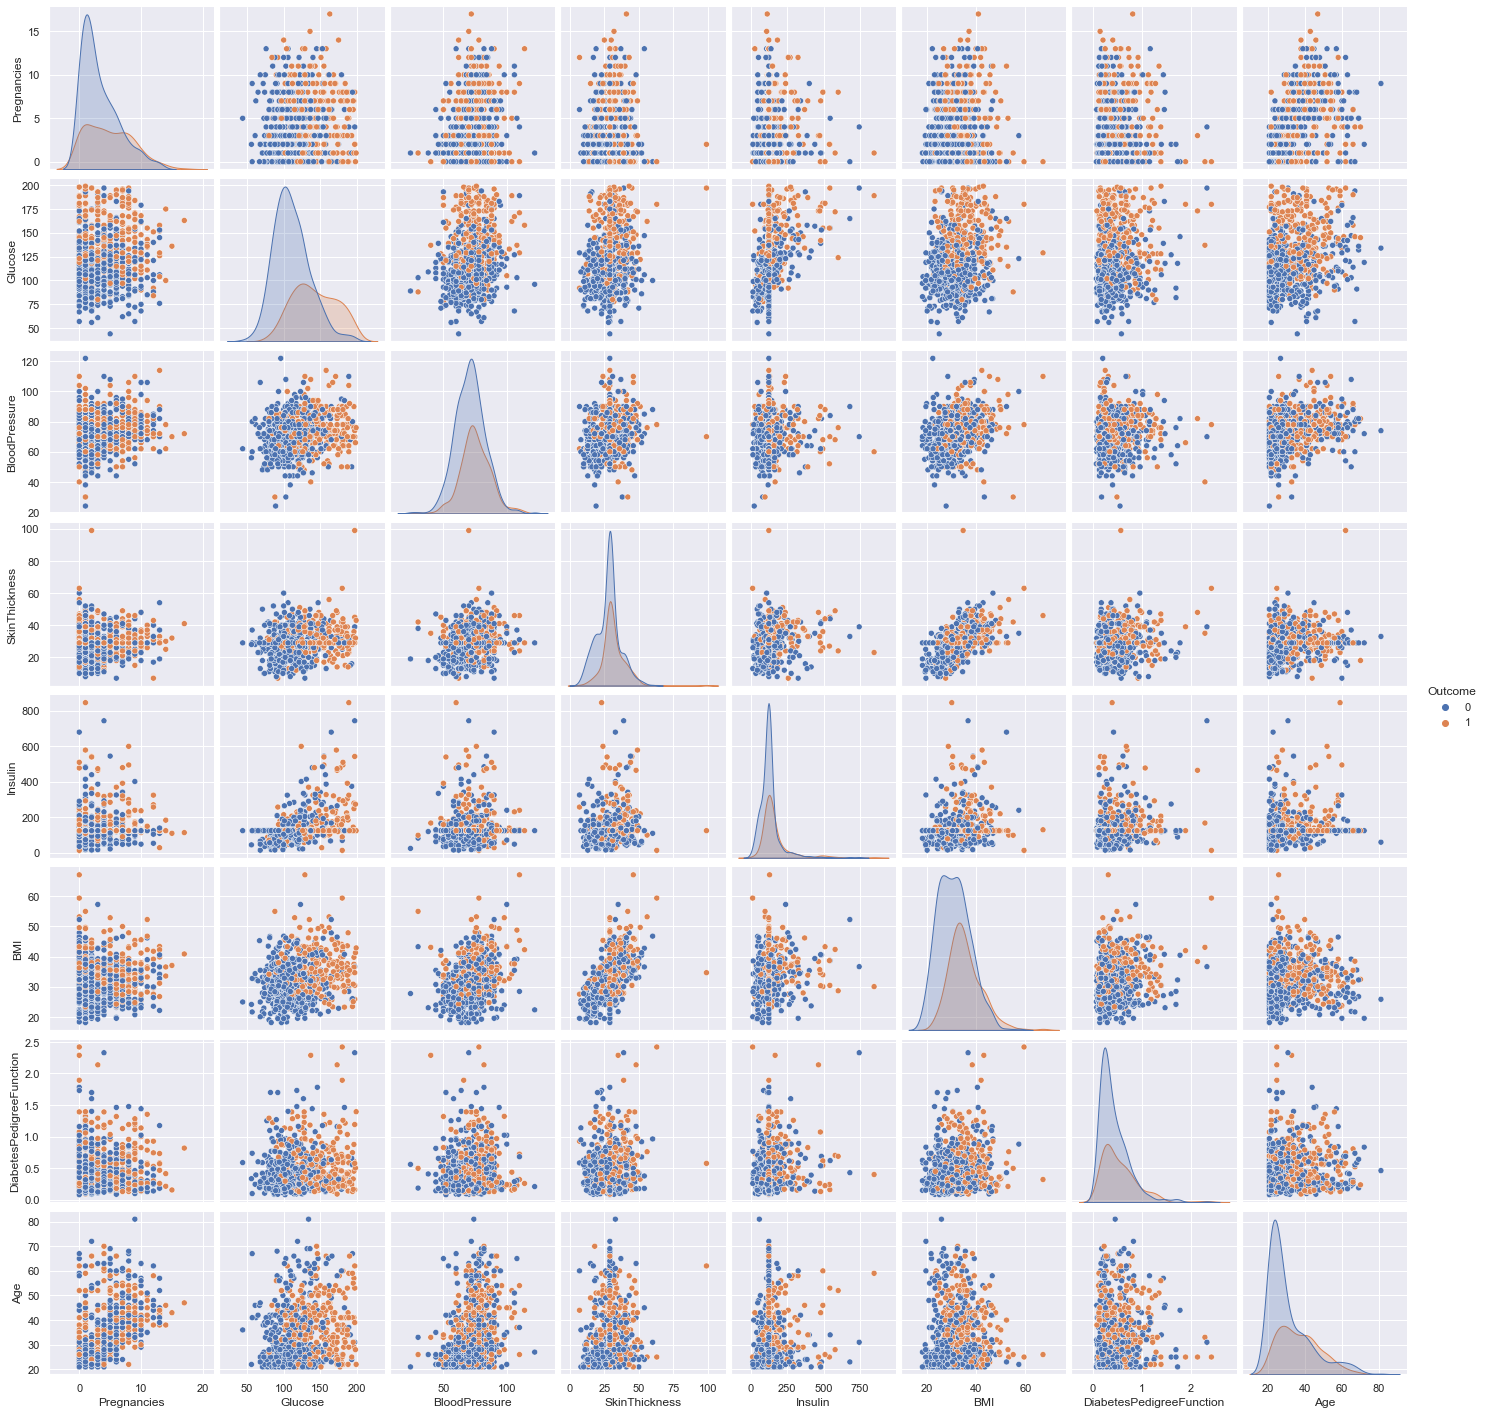

In [37]:
sns.pairplot(diabetes_data_copy,hue = "Outcome")

<AxesSubplot:>

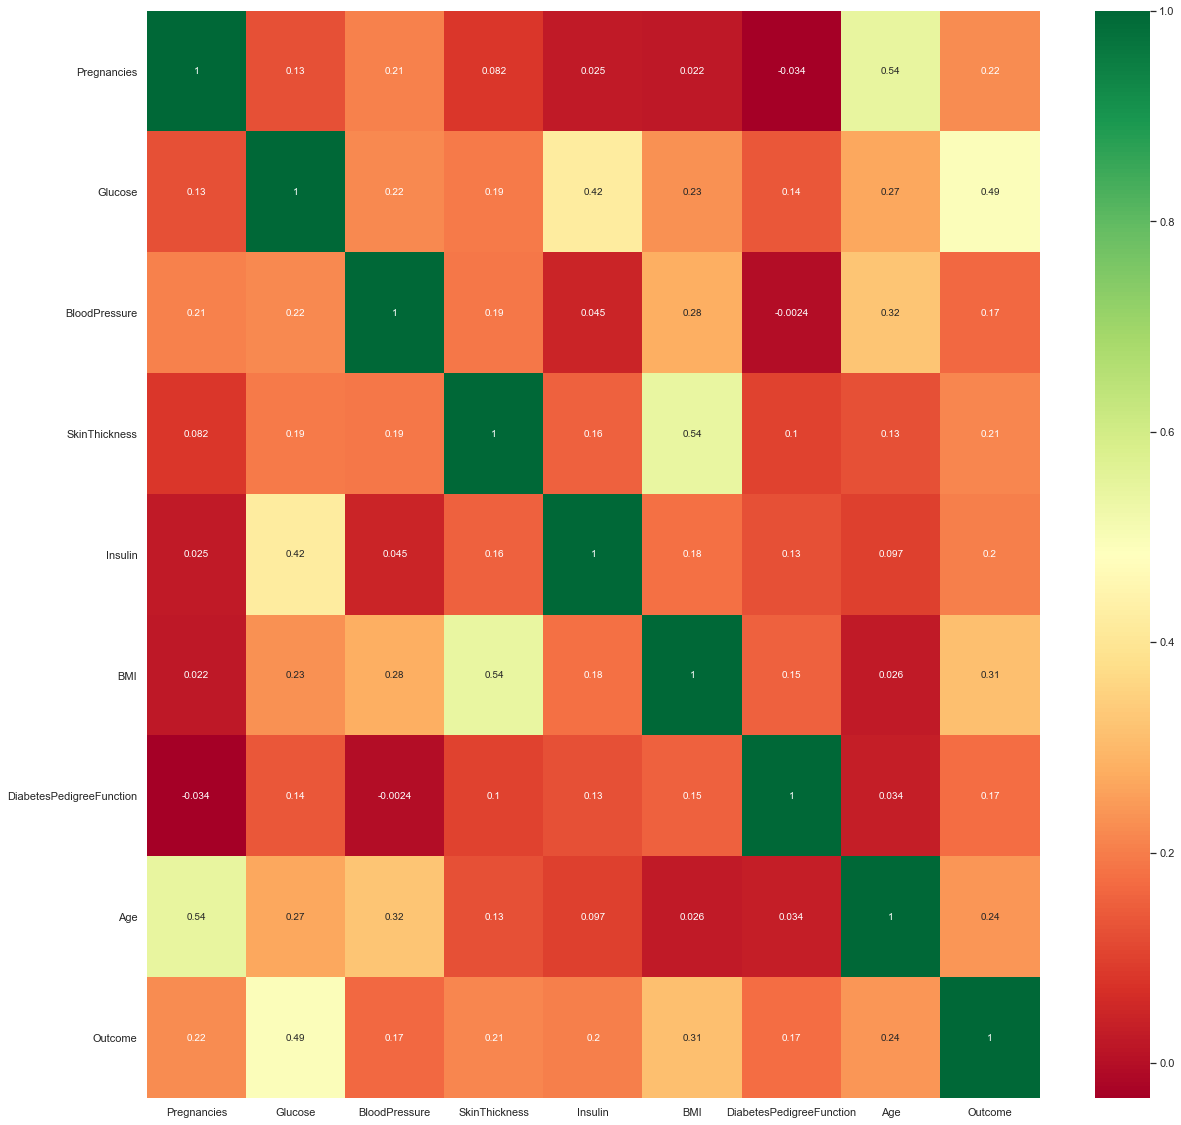

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(diabetes_data_copy.corr(),annot=True,cmap='RdYlGn')